Name: Divita Phadakale
(diph8836)

### Load training data (used the util given)

In [558]:
from typing import List, Tuple

def load_train_data(
    positive_filepath: str,
    negative_filepath: str
) -> Tuple[List[str], List[int]]:
    """Load the training data, producing Lists of text and labels

    Args:
        filepath (str): Path to the training file

    Returns:
        Tuple[List[str], List[int]]: The texts and labels
    """

    def _read(filename: str):
        texts = []
        with open(filename,"r") as f:
            for line in f:
                _id, text = line.rstrip().split("\t")
                texts.append(text)

        return texts

    texts = []
    labels = []
    for text in _read(positive_filepath):
        texts.append(text)
        labels.append(1)

    for text in _read(negative_filepath):
        texts.append(text)
        labels.append(0)

    return texts, labels

In [559]:
text, labels = load_train_data("/content/hotelPosT-train.txt", "/content/hotelNegT-train.txt")

### Positive and Negative samples
1. We have provided some starter functions in util.py; use those to load the data and explore it. What is the distribution of the training samples—how many positive samples and how many negative samples are there?


    Positive samples - 95
    Negative samples - 94

In [560]:
positive_samples_count = labels.count(1)
print(positive_samples_count)

negative_samples_count = labels.count(0)
print(negative_samples_count)

95
94


### Split data
2. Split the data into training and development sets, so that 80% of the data is in the training set, and 20% is in the development set. (Feel free to use a library such as sklearn.)

In [561]:
#Splitting into train and dev
from sklearn.model_selection import train_test_split
train_texts, dev_texts, train_labels, dev_labels = train_test_split(text, labels, test_size=0.2, random_state=42, stratify=labels)

In [562]:
print("Training Texts:", len(train_texts), train_texts)
print("Training Labels:", len(train_labels), train_labels)
print("Development Texts:", len(dev_texts), dev_texts)
print("Development Labels:", len(dev_labels), dev_labels)

Training Texts: 151 ['My wife, two-year old son and I stayed at La Quinta Inn in Garland, Texas during our vacation this Spring Break. The staff was very nice and accomodating. They quickly brought up a crib for our son soon after we requested one. The room was clean and very spacious. Our bed was also comfortable. A great breakfast came free with the stay. They offered scrambled eggs, waffles, cereals, pastries, and much more. We had a great stay here. It only cost us about $80 a night.', 'The Beachcomber Resort & Villas is what makes South Florida, South Florida. The moment I walked in I was taken back by the beautiful decor, and greeted by friendly staff. I was able to check in quickly, and with no hassle. The room was more amazing then expected! It had a BEAUTIFUL view! I looked out and saw ALL of Ft. Lauderdale on a crystal clear day. At this point, I decided I’d rather be on the beach then look at it, and no sooner then that I walked out the back door of the hotel, and was right 

### Evaluation metrics
3. Implement precision, recall, and F1

In [563]:
#Precision
def precision_score(true_labels, predicted_labels):
    tp = sum(p == 1 and t == 1 for p, t in zip(predicted_labels, true_labels))
    fp = sum(p == 1 and t == 0 for p, t in zip(predicted_labels, true_labels))
    return tp / (tp + fp) if tp + fp > 0 else 0

In [564]:
#Recall
def recall_score(true_labels, predicted_labels):
    tp = sum(p == 1 and t == 1 for p, t in zip(predicted_labels, true_labels))
    fn = sum(p == 0 and t == 1 for p, t in zip(predicted_labels, true_labels))
    return tp / (tp + fn) if tp + fn > 0 else 0

In [565]:
#F1 score
def f1_score(true_labels, predicted_labels):
    p = precision_score(predicted_labels, true_labels)
    r = recall_score(predicted_labels, true_labels)
    return 2 * p * r / (p + r) if p + r > 0 else 0

### Featurize vectors
4. Write a function that takes a text snippet and outputs its feature vector, based on Figure 2. Use the files positive-words.txt and negative-words.txt as the positive and negative lexicon.

In [566]:
def readFile(filename: str):
  with open(filename, 'r') as f:
    return set(f.read().split())

In [567]:
positive_words = readFile("/content/positive-words.txt")
print(positive_words)

{'impartiality', 'cleanly', 'thumb-up', 'well-behaved', 'qualified', 'satisfactorily', 'encouraging', 'gratifying', 'merrily', 'overture', 'restful', 'beloved', 'famously', 'congratulate', 'rock-star', 'flutter', 'mastery', 'supurb', 'fans', 'sufficient', 'reforming', 'unabashed', 'stimulate', 'traction', 'youthful', 'perfection', 'best-performing', 'incredible', 'attractive', 'felicitous', 'benefits', 'guiltless', 'altruistically', 'low-priced', 'reaffirm', 'blithe', 'openly', 'crisp', 'loyalty', 'smoothes', 'evaluative', 'endorse', 'extraordinary', 'encourage', 'resourceful', 'upgradable', 'redeeming', 'enhancement', 'honored', 'whooa', 'cherub', 'empowerment', 'gumption', 'loves', 'tantalizing', 'valor', 'gaily', 'vibrant', 'masterful', 'renaissance', 'continuity', 'magical', 'industrious', 'whoa', 'titillatingly', 'immense', 'overtaken', 'fragrant', 'invincible', 'succeeded', 'undisputed', 'vibrantly', 'energy-saving', 'persevere', 'victorious', 'luckier', 'kid-friendly', 'manageab

In [568]:
negative_words = readFile("/content/negative-words.txt")
print(negative_words)

{'misunderstanding', 'diametrically', 'beseech', 'rejected', 'clash', 'inadverent', 'bewildered', 'needy', 'inarticulate', 'shortsighted', 'squeal', 'mistress', 'clunky', 'damning', 'illogic', 'nightmare', 'oblique', 'inconsistent', 'regrettable', 'deploringly', 'mist', 'injure', 'martyrdom-seeking', 'rants', 'recant', 'slow', 'maliciousness', 'travesties', 'flakey', 'lemon', 'despoiler', 'fundamentalism', 'lamentably', 'crush', 'infuriatingly', 'conscons', 'derisive', 'swelling', 'cloudy', 'detracted', 'heckles', 'inexpert', 'crumpled', 'fawningly', 'joker', 'omit', 'fearfully', 'drags', 'demonize', 'misaligned', 'judder', 'denying', 'detriment', 'overemphasize', 'unlikely', 'freaking', 'unreasonable', 'bad', 'destruction', 'ineffectively', 'derision', 'grisly', 'darkness', 'fearsome', 'deject', 'cruelest', 'hastily', 'irritate', 'bullying', 'miscalculate', 'drippy', 'freeze', 'crashes', 'toll', 'coupists', 'puzzlement', 'scoldingly', 'thirst', 'audaciously', 'abrupt', 'dwindling', 'b

In [569]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [570]:
import math
from typing import List
from nltk.tokenize import word_tokenize
import nltk

In [571]:
def featurize_text(text):
  pronouns = {"i", "me", "my", "we", "us", "our", "you", "your", "yours"}

  x = [0.0] * 6

  words = word_tokenize(text.lower())
  # print(stemmed_words)

  x[0] = sum(1 for word in words if word in positive_words)
  x[1] = sum(1 for word in words if word in negative_words)
  x[2] = 1 if "no" in words else 0
  x[3] = sum(1 for word in words if word in pronouns)
  x[4] = 1 if "!" in text else 0
  x[5] = math.log(len(words)) if words else 0.0

  return x

In [572]:
test_string = "It's hokey. There are virtually no surprises, and the writing is second-rate. So why was it so enjoyable? For one thing, the cast is great. Another nice touch is the music. I was overcome with the urge to get off the couch and start dancing. It sucked me in, and it'll do the same to you."
features = featurize_text(test_string)
print(features)

[3, 1, 1, 3, 0, 4.219507705176107]


### Normalize vectors
5. Write a function that takes all the feature vectors in the training set and returns normalized feature vectors based on the below equation, which transforms each feature value so that they lie between 0 and 1

In [573]:
#Normalization
import numpy as np
from typing import List, Tuple

def normalize(train_feature_vectors, feature_vectors):
  train_np_arr = np.array(train_feature_vectors)
  feature_np_arr = np.array(feature_vectors)

  min_val = np.min(train_np_arr, axis=0)
  max_val = np.max(train_np_arr, axis=0)

  norm_train = (train_np_arr - min_val) / (max_val - min_val)
  norm_features = (feature_np_arr - min_val) / (max_val - min_val)

  return norm_train.tolist(), norm_features.tolist()

In [574]:
train_feature_vectors = [
    [3.0, 2.0, 1.0, 3.0, 0.0, 4.19],
    [2.0, 1.0, 0.0, 2.0, 1.0, 3.18],
    [1.0, 0.0, 1.0, 1.0, 0.0, 2.30]
]

dev_feature_vectors = [
    [4.0, 3.0, 1.0, 4.0, 1.0, 5.00],
    [3.0, 2.0, 0.0, 3.0, 0.0, 4.50]
]

normalized_train, normalized_dev = normalize(train_feature_vectors, dev_feature_vectors)
print("Normalized Training Feature Vectors:", normalized_train)
print("Normalized Development Feature Vectors:", normalized_dev)

Normalized Training Feature Vectors: [[1.0, 1.0, 1.0, 1.0, 0.0, 1.0], [0.5, 0.5, 0.0, 0.5, 1.0, 0.46560846560846564], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0]]
Normalized Development Feature Vectors: [[1.5, 1.5, 1.0, 1.5, 1.0, 1.4285714285714282], [1.0, 1.0, 0.0, 1.0, 0.0, 1.1640211640211637]]


In [575]:
#Featurize train and dev vectors
train_vectors = [featurize_text(text) for text in train_texts]
dev_vectors = [featurize_text(text) for text in dev_texts]

print(train_vectors)
print(dev_vectors)

[[7, 2, 0, 8, 0, 4.624972813284271], [8, 1, 1, 8, 1, 4.912654885736052], [11, 1, 0, 0, 0, 4.3694478524670215], [10, 3, 0, 4, 0, 4.59511985013459], [15, 1, 0, 8, 0, 5.062595033026967], [6, 2, 0, 16, 1, 5.017279836814924], [8, 1, 0, 5, 1, 4.5217885770490405], [5, 0, 0, 2, 0, 4.343805421853684], [5, 3, 0, 4, 0, 4.812184355372417], [6, 0, 0, 3, 0, 4.31748811353631], [5, 9, 0, 5, 0, 4.912654885736052], [6, 0, 0, 3, 0, 4.143134726391533], [9, 6, 0, 0, 0, 4.6443908991413725], [21, 1, 1, 14, 0, 5.4116460518550396], [13, 7, 1, 28, 1, 6.013715156042802], [7, 9, 0, 13, 0, 5.424950017481403], [9, 1, 0, 7, 0, 5.075173815233827], [7, 0, 0, 4, 1, 4.499809670330265], [2, 8, 1, 3, 0, 4.624972813284271], [2, 6, 0, 3, 0, 4.442651256490317], [5, 0, 0, 11, 0, 4.499809670330265], [8, 2, 1, 5, 0, 4.61512051684126], [3, 4, 0, 6, 0, 4.68213122712422], [9, 1, 0, 10, 1, 5.25227342804663], [12, 3, 0, 19, 1, 5.438079308923196], [1, 2, 0, 1, 0, 3.7376696182833684], [8, 2, 0, 3, 0, 4.532599493153256], [10, 0, 0, 3, 

In [576]:
#Normalize train and dev vectors
norm_train_vectors, norm_dev_vectors = normalize(train_vectors, dev_vectors)

print(norm_train_vectors)
print(norm_dev_vectors)

[[0.21212121212121213, 0.18181818181818182, 0.0, 0.1951219512195122, 0.0, 0.5517856828212173], [0.24242424242424243, 0.09090909090909091, 1.0, 0.1951219512195122, 1.0, 0.6345948936753449], [0.3333333333333333, 0.09090909090909091, 0.0, 0.0, 0.0, 0.47823288831277655], [0.30303030303030304, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.5431925150265965], [0.45454545454545453, 0.09090909090909091, 0.0, 0.1951219512195122, 0.0, 0.6777551266599477], [0.18181818181818182, 0.18181818181818182, 0.0, 0.3902439024390244, 1.0, 0.6647111590395873], [0.24242424242424243, 0.09090909090909091, 0.0, 0.12195121951219512, 1.0, 0.5220841268556211], [0.15151515151515152, 0.0, 0.0, 0.04878048780487805, 0.0, 0.4708517212300481], [0.15151515151515152, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.6056744772496645], [0.18181818181818182, 0.0, 0.0, 0.07317073170731707, 0.0, 0.4632762907731093], [0.15151515151515152, 0.8181818181818182, 0.0, 0.12195121951219512, 0.0, 0.6345948936753449], [0.18181818

### Model settings

In [577]:
import torch

In [ ]:
#Converting into torch
# _t -> tensor converted vectors
train_vectors_t = torch.tensor(norm_train_vectors, dtype=torch.float32)
train_labels_t = torch.tensor(train_labels, dtype=torch.float32)
dev_vectors_t = torch.tensor(norm_dev_vectors, dtype=torch.float32)
dev_labels_t = torch.tensor(dev_labels, dtype=torch.float32)

In [579]:
def logprob2label(log_prob):
    return 1 if log_prob.item() > 0.5 else 0

In [580]:
class SentimentClassifier(torch.nn.Module):
    def __init__(self, input_dim: int = 6, output_size: int = 1):
        super(SentimentClassifier, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_size)

    def forward(self, feature_vec):
        z = self.linear(feature_vec)
        return torch.sigmoid(z)

In [581]:
model = SentimentClassifier()

### Train models (Train + Dev)
6. Train a model for 100 epochs with a batch size of 16. Record the loss on the training set and the development set for each epoch. If the training loss decreases, the gradient descent is working as it should. If the development loss decreases, the learning is working as it should—it is generalizing well enough that it can slowly classify more and more unseen examples correctly.

In [582]:
num_epochs = 100
batch_size = 16
learning_rate = 0.1

In [583]:
# # Train data

import torch
from tqdm import tqdm
import random

def train_model(model, train_vectors, train_labels, epochs, batch_size, learning_rate):
    loss_function = torch.nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        samples = list(zip(train_vectors, train_labels))
        random.shuffle(samples)
        batches = [samples[i:i + batch_size] for i in range(0, len(samples), batch_size)]

        epoch_i_train_losses = []

        for batch in tqdm(batches):
            feature_vectors, labels = zip(*batch)
            feature_vectors = torch.stack(feature_vectors).to('cpu')
            labels = torch.tensor(labels, dtype=torch.float32).to('cpu')

            model.zero_grad()
            log_probs = model(feature_vectors)
            loss = loss_function(log_probs.squeeze(), labels)
            loss.backward()
            optimizer.step()

            epoch_i_train_losses.append(loss.item())

        print('Epoch:', epoch)
        print('Avg train loss:', sum(epoch_i_train_losses) / len(epoch_i_train_losses))

    return model, epoch_i_train_losses

In [ ]:
model, epoch_i_train_losses = train_model(model, train_vectors_t, train_labels_t, num_epochs, batch_size, learning_rate)
losses_train = epoch_i_train_losses

In [585]:
import matplotlib.pyplot as plt

def plot_training_loss(losses):
  plt.figure(figsize=(10, 6))
  plt.plot(losses, label='Training Loss', color='blue')
  plt.xlabel('Epoch', fontsize=12)
  plt.ylabel('Loss', fontsize=12)
  plt.title('Training Loss Over Epochs', fontsize=14)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.legend()
  plt.show()

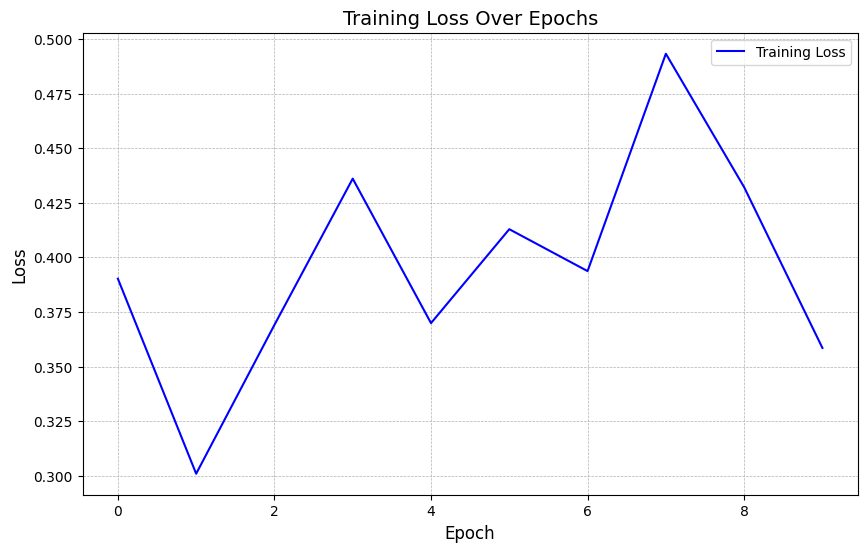

In [586]:
plot_training_loss(losses_train)

In [ ]:
# Dev data
model, epoch_i_train_losses = train_model(model, dev_vectors_t, dev_labels_t, num_epochs, batch_size, learning_rate)
losses_dev = epoch_i_train_losses

In [588]:
import matplotlib.pyplot as plt

def plot_dev_loss(losses_dev):
  plt.figure(figsize=(10, 6))
  plt.plot(losses_dev, label='Dev Loss', color='blue')
  plt.xlabel('Epoch', fontsize=12)
  plt.ylabel('Loss', fontsize=12)
  plt.title('Development Loss Over Epochs', fontsize=14)
  plt.grid(True, which='both', linestyle='--', linewidth=0.5)
  plt.legend()
  plt.show()

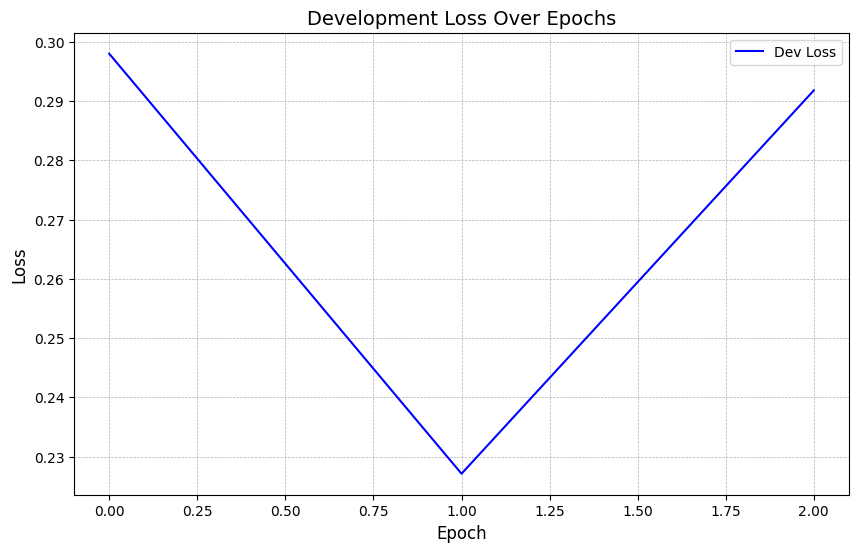

In [589]:
plot_dev_loss(losses_dev)

In [590]:
with torch.no_grad():
  dev_probs = model(dev_vectors_t)

predicted_dev_labels = [logprob2label(p) for p in dev_probs]
print(predicted_dev_labels)
print(dev_labels)

[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


### Calculate evaluation metrics for dev
7. Calculate the precision, recall, and F1 on the entirety of the development set using your trained model. Remem- ber that model output is probability, which should be converted to a binary 0/1 label for our metric functions.

In [591]:
def evaluation_metrics(predicted_labels, true_labels):
  pre = precision_score(true_labels, predicted_labels)
  re = recall_score(true_labels, predicted_labels)
  f = f1_score(true_labels, predicted_labels)

  print(f'Precision: {pre}')
  print(f'Recall: {re}')
  print(f'F1 Score: {f}')


In [592]:
evaluation_metrics(predicted_dev_labels, dev_labels)

Precision: 0.9047619047619048
Recall: 1.0
F1 Score: 0.9500000000000001


### Apply on test model

8. Experiment with different settings: for example, switch up the number of epochs, batch size, or learning rate.
Run your best-performing model (i.e. the model with the highest F1 on the development set) on the test data.

In [593]:
def load_test_data(filepath: str) -> List[str]:
    """Load the test data, producing a List of texts

    Args:
        filepath (str): Path to the training file

    Returns:
        List[str]: The texts
    """
    texts = []
    labels = []
    with open(filepath, "r") as file:
        for line in file:
            idx, text, label = line.rstrip().split("\t")
            texts.append(text)
            if label == 'POS':
                label = 1
            else:
                label = 0
            labels.append(label)

    return texts, labels

In [594]:
text_test, labels_test = load_test_data("/content/HW2-testset.txt")

In [595]:
#Featurize test vectors
test_vectors = [featurize_text(text) for text in text_test]

print(test_vectors)

[[5, 3, 1, 30, 1, 5.68697535633982], [7, 11, 1, 52, 0, 6.411818267709897], [2, 3, 1, 5, 0, 4.574710978503383], [1, 7, 0, 4, 0, 4.204692619390966], [4, 13, 1, 20, 0, 5.62040086571715], [2, 2, 0, 7, 0, 4.532599493153256], [2, 4, 0, 4, 0, 4.418840607796598], [2, 1, 0, 4, 0, 3.9512437185814275], [2, 3, 0, 2, 1, 4.343805421853684], [5, 9, 1, 30, 0, 5.4510384535657], [1, 7, 0, 3, 0, 4.653960350157523], [3, 3, 1, 4, 0, 4.962844630259907], [2, 3, 0, 3, 1, 4.406719247264253], [5, 2, 0, 2, 0, 3.8918202981106265], [8, 2, 0, 6, 0, 4.919980925828125], [1, 1, 0, 4, 0, 3.58351893845611], [0, 2, 1, 1, 0, 3.332204510175204], [3, 11, 1, 20, 0, 5.472270673671475], [2, 4, 0, 2, 0, 4.90527477843843], [3, 7, 1, 13, 1, 5.2574953720277815], [10, 1, 0, 8, 0, 4.762173934797756], [10, 7, 1, 12, 0, 5.484796933490655], [6, 4, 1, 9, 0, 5.0106352940962555], [1, 5, 0, 6, 0, 4.532599493153256], [1, 3, 0, 10, 0, 4.762173934797756], [9, 0, 0, 10, 0, 4.941642422609304], [4, 0, 0, 7, 1, 4.02535169073515], [11, 3, 1, 14, 0

In [596]:
#Normalize test vectors
norm_train_vectors, norm_test_vectors = normalize(train_vectors, test_vectors)

print(norm_train_vectors)
print(norm_test_vectors)

[[0.21212121212121213, 0.18181818181818182, 0.0, 0.1951219512195122, 0.0, 0.5517856828212173], [0.24242424242424243, 0.09090909090909091, 1.0, 0.1951219512195122, 1.0, 0.6345948936753449], [0.3333333333333333, 0.09090909090909091, 0.0, 0.0, 0.0, 0.47823288831277655], [0.30303030303030304, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.5431925150265965], [0.45454545454545453, 0.09090909090909091, 0.0, 0.1951219512195122, 0.0, 0.6777551266599477], [0.18181818181818182, 0.18181818181818182, 0.0, 0.3902439024390244, 1.0, 0.6647111590395873], [0.24242424242424243, 0.09090909090909091, 0.0, 0.12195121951219512, 1.0, 0.5220841268556211], [0.15151515151515152, 0.0, 0.0, 0.04878048780487805, 0.0, 0.4708517212300481], [0.15151515151515152, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.6056744772496645], [0.18181818181818182, 0.0, 0.0, 0.07317073170731707, 0.0, 0.4632762907731093], [0.15151515151515152, 0.8181818181818182, 0.0, 0.12195121951219512, 0.0, 0.6345948936753449], [0.18181818

In [597]:
test_vectors_t = torch.tensor(norm_test_vectors, dtype=torch.float32)
test_labels_t = torch.tensor(labels_test, dtype=torch.float32)

In [ ]:
with torch.no_grad():
  test_probs = model(test_vectors_t)

predicted_test_labels = [logprob2label(p) for p in test_probs]
print(predicted_test_labels)
print(labels_test)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
evaluation_metrics(predicted_test_labels, labels_test)

Precision: 0.7931034482758621
Recall: 0.92
F1 Score: 0.851851851851852


### Hyperparameter tuning

In [600]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, vectors, labels):
    with torch.no_grad():
        probs = model(vectors.to('cpu'))
    predicted_labels = [logprob2label(p) for p in probs]
    precision = precision_score(labels, predicted_labels)
    recall = recall_score(labels, predicted_labels)
    f1 = f1_score(labels, predicted_labels)
    return precision, recall, f1


In [ ]:
from pandas import DataFrame
import pandas as pd

epochs_list = [50, 100, 150]
batch_sizes = [8, 16, 32]
learning_rates = [0.01, 0.05, 0.1]

results = []

for epochs in epochs_list:
    for batch_size in batch_sizes:
        for lr in learning_rates:
            print(f'Training with epochs={epochs}, batch_size={batch_size}, lr={lr}')

            model = SentimentClassifier()

            # Train the model
            model, l = train_model(model, train_vectors_t, train_labels, epochs, batch_size, lr)

            #Train dev
            model, l = train_model(model, dev_vectors_t, dev_labels, epochs, batch_size, lr)

            # Evaluate the model on the dev set
            precision, recall, f1 = evaluate_model(model, dev_vectors_t, dev_labels)

            # Store the results
            results.append({
                'epochs': epochs,
                'batch_size': batch_size,
                'learning_rate': lr,
                'precision': precision,
                'recall': recall,
                'f1': f1
            })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

In [601]:
print(results_df)

    epochs  batch_size  learning_rate  precision    recall        f1
0       50           8           0.01   0.857143  0.947368  0.900000
1       50           8           0.05   0.863636  1.000000  0.926829
2       50           8           0.10   0.904762  1.000000  0.950000
3       50          16           0.01   0.782609  0.947368  0.857143
4       50          16           0.05   0.818182  0.947368  0.878049
5       50          16           0.10   0.863636  1.000000  0.926829
6       50          32           0.01   0.826087  1.000000  0.904762
7       50          32           0.05   0.826087  1.000000  0.904762
8       50          32           0.10   0.818182  0.947368  0.878049
9      100           8           0.01   0.857143  0.947368  0.900000
10     100           8           0.05   0.904762  1.000000  0.950000
11     100           8           0.10   0.904762  1.000000  0.950000
12     100          16           0.01   0.904762  1.000000  0.950000
13     100          16           0

In [ ]:
best_f1_index = results_df['f1'].idxmax()

best_f1_row = results_df.loc[best_f1_index]

print("Best F1 Score Row:")
print(best_f1_row)

Best F1 Score Row:
epochs           150.000000
batch_size         8.000000
learning_rate      0.050000
precision          0.950000
recall             1.000000
f1                 0.974359
Name: 19, dtype: float64


### Writeup

### Comparison between different parameters

In [ ]:
num_tries = 10

top_5_f1 = results_df.nlargest(5, 'f1')
bottom_5_f1 = results_df.nsmallest(5, 'f1')

top_params = top_5_f1[['epochs', 'batch_size', 'learning_rate']]
bottom_params = bottom_5_f1[['epochs', 'batch_size', 'learning_rate']]

train_lossess = []
dev_losses = []

model = SentimentClassifier()
for index, row in top_params.iterrows():
    print(f"Training with top parameters: epochs={row['epochs']}, batch_size={row['batch_size']}, lr={row['learning_rate']}")
    model, loss = train_model(model, train_vectors_t, train_labels_t, int(row['epochs']), int(row['batch_size']), row['learning_rate'])
    train_lossess.append(loss)
    model, loss = train_model(model, dev_vectors_t, dev_labels_t, int(row['epochs']), int(row['batch_size']), row['learning_rate'])
    dev_losses.append(loss)

for index, row in bottom_params.iterrows():
    print(f"Training with bottom parameters: epochs={row['epochs']}, batch_size={row['batch_size']}, lr={row['learning_rate']}")
    model, loss = train_model(model, train_vectors_t, train_labels_t, int(row['epochs']), int(row['batch_size']), row['learning_rate'])
    train_lossess.append(loss)
    model, loss = train_model(model, dev_vectors_t, dev_labels_t, int(row['epochs']), int(row['batch_size']), row['learning_rate'])
    dev_losses.append(loss)


In [222]:
print(train_lossess)
print(dev_losses)
len(train_lossess)

[[0.3723491132259369, 0.421112060546875, 0.48071590065956116, 0.184564009308815, 0.3061363995075226, 0.362878680229187, 0.3956106901168823, 0.22573022544384003, 0.2644291818141937, 0.42824047803878784, 0.6351094841957092, 0.2191576361656189, 0.3464292585849762, 0.3420217037200928, 0.4135589897632599, 0.5250852108001709, 0.4588223099708557, 0.3999284505844116, 0.21162839233875275], [0.10517487674951553, 0.28797897696495056, 0.6633664965629578, 0.17094801366329193, 0.27859383821487427, 0.3748866021633148, 0.20291505753993988, 0.26903682947158813, 0.1492534577846527, 0.2720228433609009, 0.239431694149971, 0.22623232007026672, 0.6165047883987427, 0.07692819088697433, 0.5159124732017517, 0.5281581878662109, 0.22567446529865265, 0.23901568353176117, 0.34178370237350464], [0.5381301641464233, 0.1420622318983078, 0.46673473715782166, 0.4050103425979614, 0.3187738358974457, 0.18842262029647827, 0.4059183597564697, 0.16509002447128296, 0.06822408735752106, 0.2823914885520935, 0.16262808442115784

10

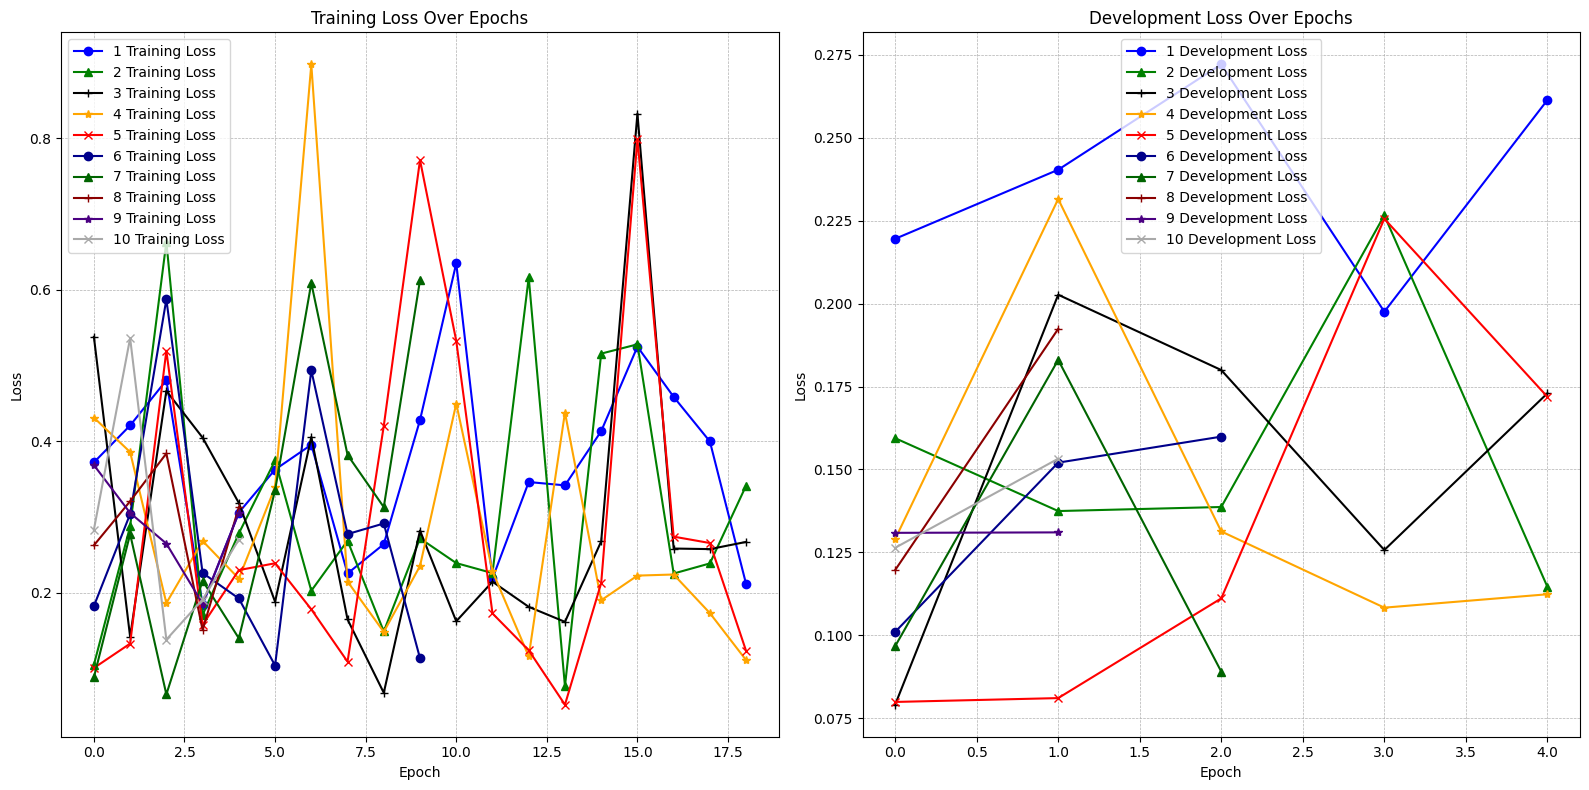

In [225]:
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Define colors and markers for plotting
colors = ['blue', 'green', 'black', 'orange', 'red', '#00008B', '#006400', '#8B0000', '#4B0082', '#A9A9A9']
markers = ['o', '^', '+', '*', 'x', 'o', '^', '+', '*', 'x']

# Plot training losses
for i in range(10):
    axs[0].plot(train_lossess[i], label=f'{i+1} Training Loss', color=colors[i], marker=markers[i])

axs[0].set_title('Training Loss Over Epochs')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0].legend()

# Plot development losses
for i in range(10):
    axs[1].plot(dev_losses[i], label=f'{i+1} Development Loss', color=colors[i], marker=markers[i])

axs[1].set_title('Development Loss Over Epochs')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1].legend()

plt.tight_layout()
plt.show()

### Without normalization

In [ ]:
# _n -> denotes without normalization (i'm sorry i'm bad at giving names ;)
model_n = SentimentClassifier()

In [604]:
num_epochs = 100
batch_size = 16
learning_rate = 0.1

In [605]:
print(train_vectors)
print(dev_vectors)

[[7, 2, 0, 8, 0, 4.624972813284271], [8, 1, 1, 8, 1, 4.912654885736052], [11, 1, 0, 0, 0, 4.3694478524670215], [10, 3, 0, 4, 0, 4.59511985013459], [15, 1, 0, 8, 0, 5.062595033026967], [6, 2, 0, 16, 1, 5.017279836814924], [8, 1, 0, 5, 1, 4.5217885770490405], [5, 0, 0, 2, 0, 4.343805421853684], [5, 3, 0, 4, 0, 4.812184355372417], [6, 0, 0, 3, 0, 4.31748811353631], [5, 9, 0, 5, 0, 4.912654885736052], [6, 0, 0, 3, 0, 4.143134726391533], [9, 6, 0, 0, 0, 4.6443908991413725], [21, 1, 1, 14, 0, 5.4116460518550396], [13, 7, 1, 28, 1, 6.013715156042802], [7, 9, 0, 13, 0, 5.424950017481403], [9, 1, 0, 7, 0, 5.075173815233827], [7, 0, 0, 4, 1, 4.499809670330265], [2, 8, 1, 3, 0, 4.624972813284271], [2, 6, 0, 3, 0, 4.442651256490317], [5, 0, 0, 11, 0, 4.499809670330265], [8, 2, 1, 5, 0, 4.61512051684126], [3, 4, 0, 6, 0, 4.68213122712422], [9, 1, 0, 10, 1, 5.25227342804663], [12, 3, 0, 19, 1, 5.438079308923196], [1, 2, 0, 1, 0, 3.7376696182833684], [8, 2, 0, 3, 0, 4.532599493153256], [10, 0, 0, 3, 

In [606]:
#Converting into torch
train_vectors_n = torch.tensor(train_vectors, dtype=torch.float32)
train_labels_n = torch.tensor(train_labels, dtype=torch.float32)
dev_vectors_n = torch.tensor(dev_vectors, dtype=torch.float32)
dev_labels_n = torch.tensor(dev_labels, dtype=torch.float32)

In [ ]:
import time
model_n, no_norm_train = train_model(model_n, train_vectors_n, train_labels_n, num_epochs, batch_size, learning_rate)
print(no_norm_train)


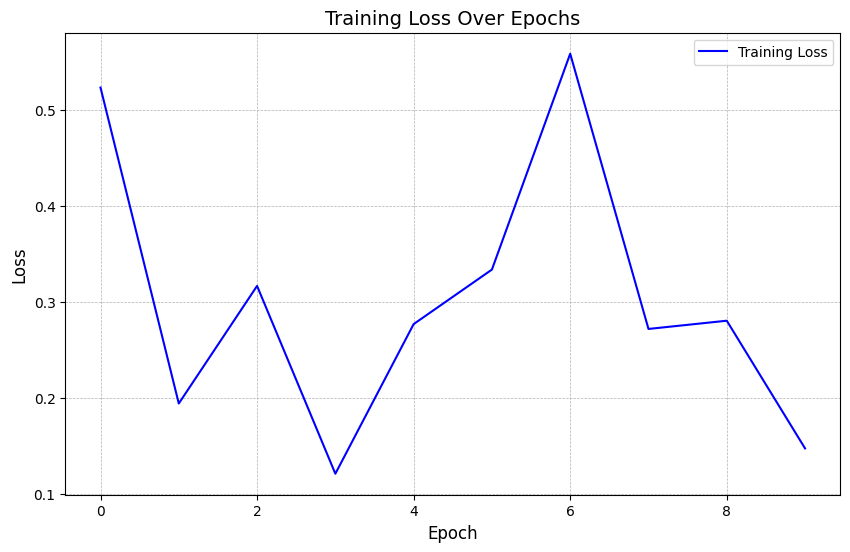

In [608]:
plot_training_loss(no_norm_train)

In [ ]:
model_n, no_norm_dev = train_model(model_n, dev_vectors_n, dev_labels_n, num_epochs, batch_size, learning_rate)
print(no_norm_dev)

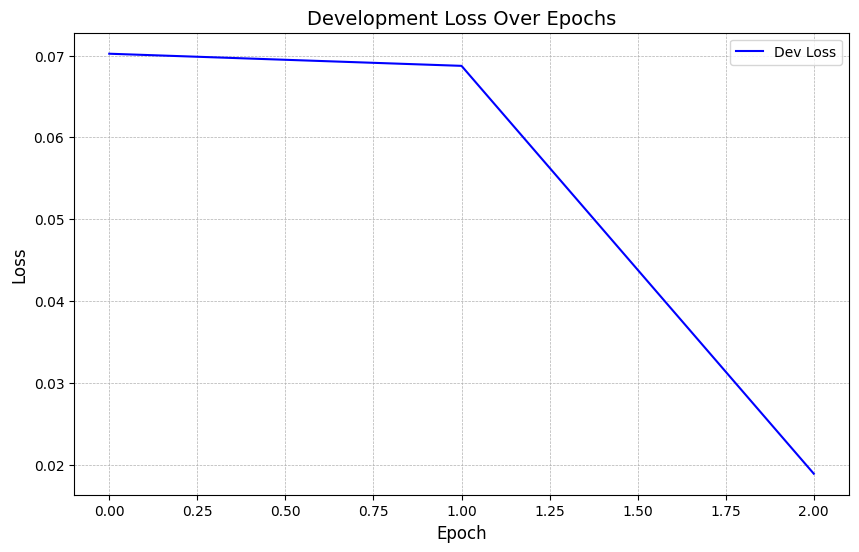

In [610]:
plot_dev_loss(no_norm_dev)

In [611]:
with torch.no_grad():
  dev_probs_n = model_n(dev_vectors_t)

predicted_dev_labels_n = [logprob2label(p) for p in dev_probs_n]
print(predicted_dev_labels_n)
print(dev_labels)

[1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [612]:
evaluation_metrics(predicted_dev_labels_n, dev_labels_n)

Precision: 0.7727272727272727
Recall: 0.8947368421052632
F1 Score: 0.8292682926829268


### Without feature

In [613]:
def featurize_text_5(text):
  pronouns = {"i", "me", "my", "we", "us", "our", "you", "your", "yours"}

  x = [0.0] * 5

  words = word_tokenize(text.lower())
  # print(stemmed_words)

  x[0] = sum(1 for word in words if word in positive_words)
  # x[1] = sum(1 for word in words if word in negative_words)
  x[1] = 1 if "no" in words else 0
  x[2] = sum(1 for word in words if word in pronouns)
  x[3] = 1 if "!" in text else 0
  x[4] = math.log(len(words)) if words else 0.0

  return x

In [614]:
#Featurize train and dev vectors
train_vectors_w = [featurize_text_5(text) for text in train_texts]
dev_vectors_w = [featurize_text_5(text) for text in dev_texts]

print(train_vectors_w)
print(dev_vectors_w)

[[7, 0, 8, 0, 4.624972813284271], [8, 1, 8, 1, 4.912654885736052], [11, 0, 0, 0, 4.3694478524670215], [10, 0, 4, 0, 4.59511985013459], [15, 0, 8, 0, 5.062595033026967], [6, 0, 16, 1, 5.017279836814924], [8, 0, 5, 1, 4.5217885770490405], [5, 0, 2, 0, 4.343805421853684], [5, 0, 4, 0, 4.812184355372417], [6, 0, 3, 0, 4.31748811353631], [5, 0, 5, 0, 4.912654885736052], [6, 0, 3, 0, 4.143134726391533], [9, 0, 0, 0, 4.6443908991413725], [21, 1, 14, 0, 5.4116460518550396], [13, 1, 28, 1, 6.013715156042802], [7, 0, 13, 0, 5.424950017481403], [9, 0, 7, 0, 5.075173815233827], [7, 0, 4, 1, 4.499809670330265], [2, 1, 3, 0, 4.624972813284271], [2, 0, 3, 0, 4.442651256490317], [5, 0, 11, 0, 4.499809670330265], [8, 1, 5, 0, 4.61512051684126], [3, 0, 6, 0, 4.68213122712422], [9, 0, 10, 1, 5.25227342804663], [12, 0, 19, 1, 5.438079308923196], [1, 0, 1, 0, 3.7376696182833684], [8, 0, 3, 0, 4.532599493153256], [10, 0, 3, 0, 4.418840607796598], [2, 0, 15, 0, 4.867534450455582], [2, 0, 9, 1, 4.543294782270

In [615]:
#Normalize train and dev vectors
norm_train_vectors_w, norm_dev_vectors_w = normalize(train_vectors_w, dev_vectors_w)

print(norm_train_vectors)
print(norm_dev_vectors)

[[0.21212121212121213, 0.18181818181818182, 0.0, 0.1951219512195122, 0.0, 0.5517856828212173], [0.24242424242424243, 0.09090909090909091, 1.0, 0.1951219512195122, 1.0, 0.6345948936753449], [0.3333333333333333, 0.09090909090909091, 0.0, 0.0, 0.0, 0.47823288831277655], [0.30303030303030304, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.5431925150265965], [0.45454545454545453, 0.09090909090909091, 0.0, 0.1951219512195122, 0.0, 0.6777551266599477], [0.18181818181818182, 0.18181818181818182, 0.0, 0.3902439024390244, 1.0, 0.6647111590395873], [0.24242424242424243, 0.09090909090909091, 0.0, 0.12195121951219512, 1.0, 0.5220841268556211], [0.15151515151515152, 0.0, 0.0, 0.04878048780487805, 0.0, 0.4708517212300481], [0.15151515151515152, 0.2727272727272727, 0.0, 0.0975609756097561, 0.0, 0.6056744772496645], [0.18181818181818182, 0.0, 0.0, 0.07317073170731707, 0.0, 0.4632762907731093], [0.15151515151515152, 0.8181818181818182, 0.0, 0.12195121951219512, 0.0, 0.6345948936753449], [0.18181818

In [616]:
#Converting into torch
train_vectors_w = torch.tensor(norm_train_vectors_w, dtype=torch.float32)
train_labels_w = torch.tensor(train_labels, dtype=torch.float32)
dev_vectors_w = torch.tensor(norm_dev_vectors_w, dtype=torch.float32)
dev_labels_w = torch.tensor(dev_labels, dtype=torch.float32)

In [ ]:
# _w or _f -> denote without one feature
model_f = SentimentClassifier(input_dim = 5)

In [618]:
num_epochs = 100
batch_size = 16
learning_rate = 0.1

In [ ]:
model_f, train_w = train_model(model_f, train_vectors_w, train_labels_w, num_epochs, batch_size, learning_rate)

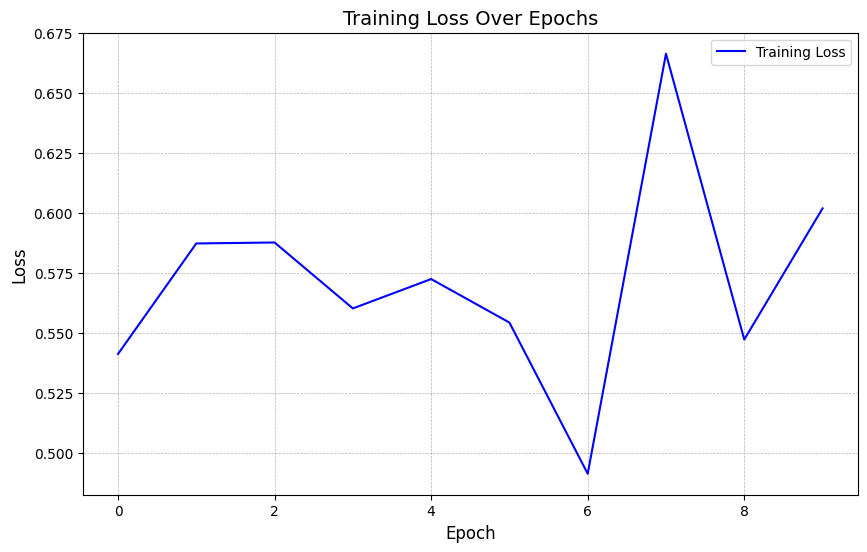

In [620]:
plot_training_loss(train_w)

In [ ]:
model_f, dev_w = train_model(model_f, dev_vectors_w, dev_labels_w, num_epochs, batch_size, learning_rate)

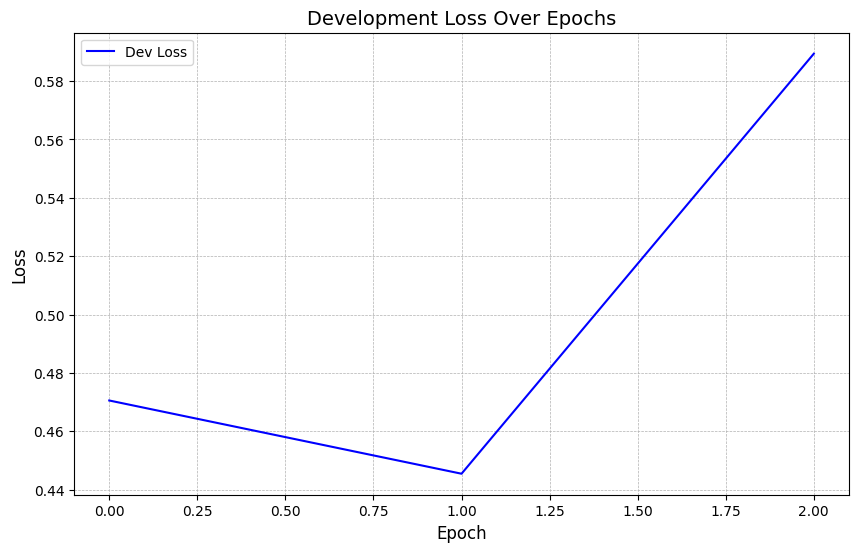

In [622]:
plot_dev_loss(dev_w)

In [623]:
with torch.no_grad():
  dev_probs_f = model_f(dev_vectors_w)

predicted_dev_labels_f = [logprob2label(p) for p in dev_probs_f]
print(predicted_dev_labels_f)
print(dev_labels)

[0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1]
[1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [624]:
evaluation_metrics(predicted_dev_labels_f, dev_labels)

Precision: 0.85
Recall: 0.8947368421052632
F1 Score: 0.8717948717948718
